<a href="https://colab.research.google.com/github/calemhoffman/softhub/blob/master/python/mona_proposals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 30F -> 29F

In [16]:
##@title FSU INT Data #j, energy, number, p-h
f29_fsu_data = np.array([[5/2,-208.378,1,2],
                     [1/2,-208.112,1,2],  
                     [9/2,-207.143,1,2],
                     [5/2,-206.938,2,0],
                     [3/2,-206.374,1,2],
                     [1/2,-203.436,2,0]])

f30_fsu_data = np.array([[2,-206.573,1,2],
                         [3,-206.428,1,2],
                         [4,-206.224,1,2],
                         [4,-205.930,2,0],
                         [2,-205.899,2,0],
                         [6,-205.278,1,0],
                         [6,-205.806,2,2]])

print(f29_fsu_data)
print(f30_fsu_data)

[[   2.5   -208.378    1.       2.   ]
 [   0.5   -208.112    1.       2.   ]
 [   4.5   -207.143    1.       2.   ]
 [   2.5   -206.938    2.       0.   ]
 [   1.5   -206.374    1.       2.   ]
 [   0.5   -203.436    2.       0.   ]]
[[   2.    -206.573    1.       2.   ]
 [   3.    -206.428    1.       2.   ]
 [   4.    -206.224    1.       2.   ]
 [   4.    -205.93     2.       0.   ]
 [   2.    -205.899    2.       0.   ]
 [   6.    -205.278    1.       0.   ]
 [   6.    -205.806    2.       2.   ]]


In [ ]:
f29_fsu_df = pd.DataFrame({'j':f29_fsu_data[:,0], 'e':f29_fsu_data[:,1],
                       'n':f29_fsu_data[:,2], 'p-h':f29_fsu_data[:,3]})
print(f29_fsu_df)
f29_fsu_df.plot(x="j",y="e",kind="scatter")
#print(f29_data)#print(f29_data[0,:])#print(f29_data[:,0])

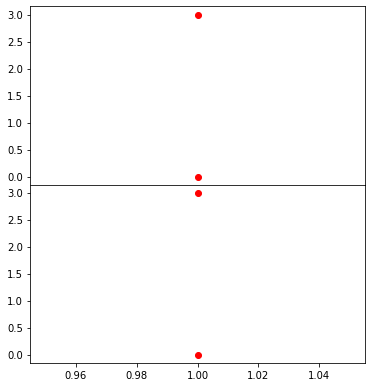

In [22]:
#plot setup / run
fig,ax = plt.subplots(2,1,figsize=(6,6))
plt.subplots_adjust(hspace=0,wspace=0,top=0.95,right=0.90)
x_data = np.ones(2)
y_data = f29_data[:,0]
ax[0].plot(x_data,y_data,'o',c='r',label=r'x vs. y')
ax[1].plot(x_data,y_data,'o',c='r',label=r'x vs. y')

plt.show()